In [1]:
#librairie à charger
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

https://www.kaggle.com/datasets/sumangoda/food-prices

# Vital Food Costs: A Five-Nation Analysis 2018-2022

In [2]:
dt = pd.read_csv("Food Prices.csv", sep = ";")

In [3]:
dt.head()

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,1,High
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,1,High
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,1,High
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,1,High


In [4]:
dt.columns

Index(['Country ', 'Year ', 'Month ', 'Food Item ', 'Unit of Measurement',
       'Average Price ', 'Currency ', 'Price in USD', 'Availability ',
       'Quality '],
      dtype='object')

In [5]:
dt.shape

(1200, 10)

In [6]:
dt.dtypes

Country                 object
Year                     int64
Month                    int64
Food Item               object
Unit of Measurement     object
Average Price          float64
Currency                object
Price in USD           float64
Availability             int64
Quality                 object
dtype: object

In [7]:
dt.describe()

,Year,Month,Average Price,Price in USD,Availability
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.0
mean,2020.000000,6.500000,59.129550,1.801842,1.0
std,1.414803,3.453492,103.155832,0.725390,0.0
min,2018.000000,1.000000,1.220000,0.690000,1.0
25%,2019.000000,3.750000,3.207500,1.170000,1.0
50%,2020.000000,6.500000,13.355000,1.680000,1.0
75%,2021.000000,9.250000,28.882500,2.320000,1.0
max,2022.000000,12.000000,421.430000,4.030000,1.0


# Analyse du dataset

## Country

In [8]:
label = list(dt['Country '].unique())

In [9]:
label

['Australia', 'Sweden', 'Japan', 'South Africa', 'Canada']

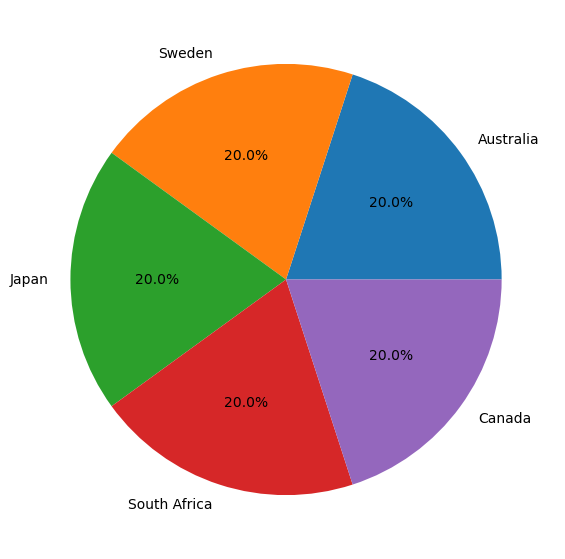

In [10]:
# Variable de type string 
plt.figure(figsize = (7,7))
count = dt['Country '].value_counts()
plt.pie(x = count, labels = label, autopct='%1.1f%%')
plt.show()

## Year et Month

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              1200 non-null   object 
 1   Year                 1200 non-null   int64  
 2   Month                1200 non-null   int64  
 3   Food Item            1200 non-null   object 
 4   Unit of Measurement  1200 non-null   object 
 5   Average Price        1200 non-null   float64
 6   Currency             1200 non-null   object 
 7   Price in USD         1200 non-null   float64
 8   Availability         1200 non-null   int64  
 9   Quality              1200 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 93.9+ KB


In [12]:
dt.describe()

,Year,Month,Average Price,Price in USD,Availability
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.0
mean,2020.000000,6.500000,59.129550,1.801842,1.0
std,1.414803,3.453492,103.155832,0.725390,0.0
min,2018.000000,1.000000,1.220000,0.690000,1.0
25%,2019.000000,3.750000,3.207500,1.170000,1.0
50%,2020.000000,6.500000,13.355000,1.680000,1.0
75%,2021.000000,9.250000,28.882500,2.320000,1.0
max,2022.000000,12.000000,421.430000,4.030000,1.0


In [13]:
dt['Year '].nunique(), dt['Month '].nunique()

(5, 12)

In [14]:
dt['Year '].unique()

array([2018, 2019, 2020, 2021, 2022], dtype=int64)

In [15]:
dt['Month '].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Transformer Year et Month en format datetime

Year : 2018,2019,2020,2021,2022

## Food Item

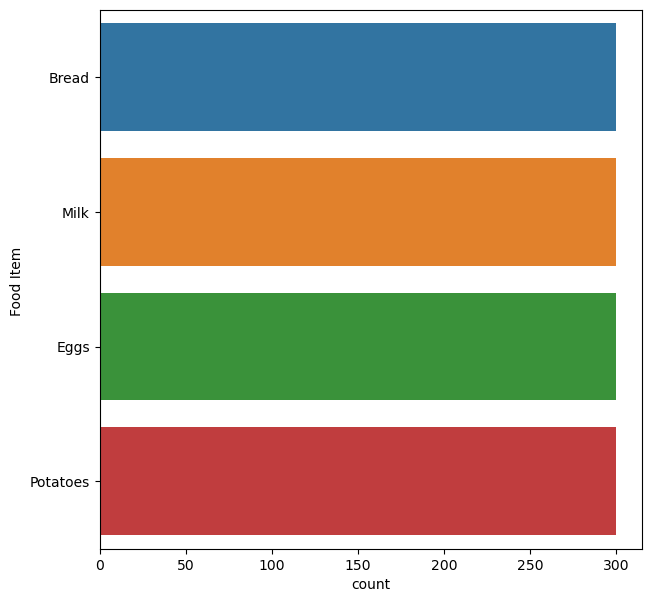

In [16]:
plt.figure(figsize=(7,7))
sns.countplot(data = dt,  y='Food Item ')
plt.show()

300 produits dans chaque catégories

## Unit of Measurement

In [17]:
dt['Unit of Measurement'].unique()

array(['Loaf', '1 L', 'Carton of 12', '1 Kg'], dtype=object)

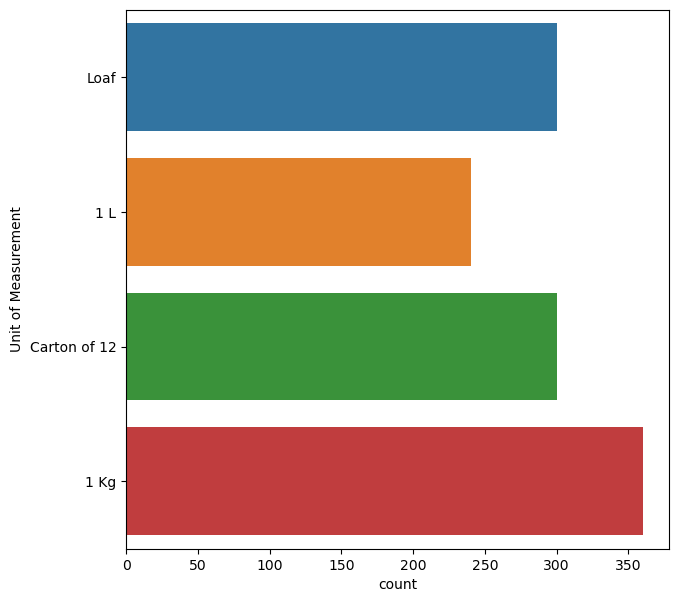

In [18]:
plt.figure(figsize=(7,7))
sns.countplot(data = dt,  y='Unit of Measurement')
plt.show()

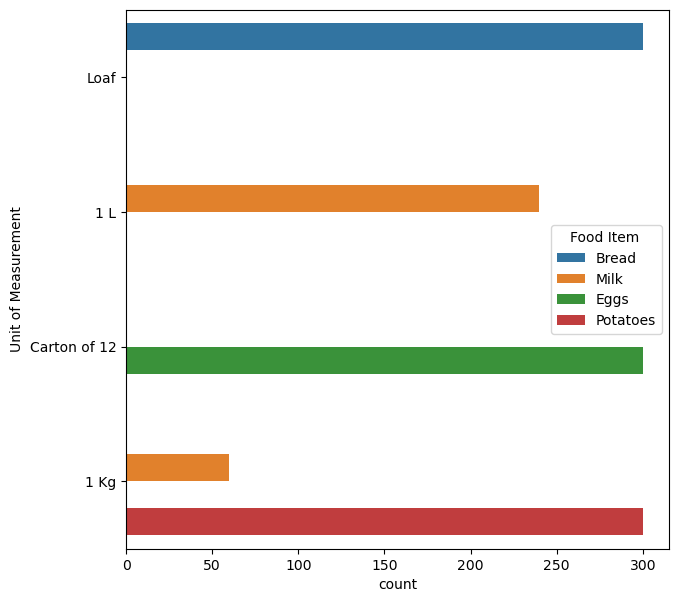

In [19]:
plt.figure(figsize=(7,7))
sns.countplot(data = dt,  y='Unit of Measurement', hue = 'Food Item ')
plt.show() 

## Average Price et Currency et Price in USD

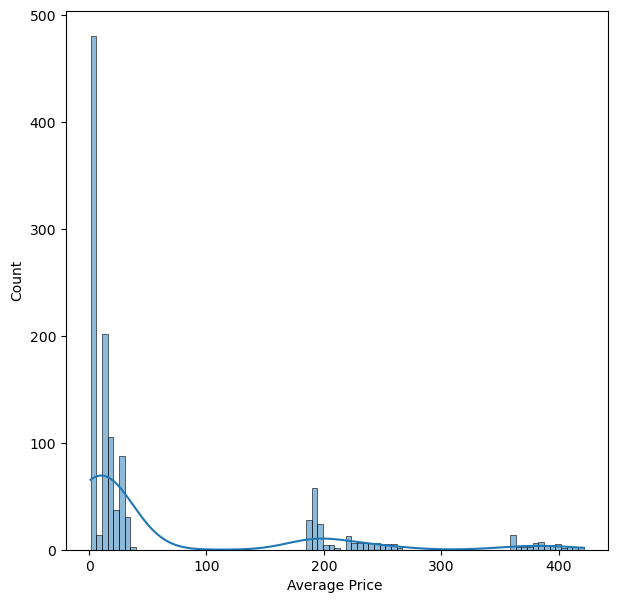

In [20]:
plt.figure(figsize=(7,7))
sns.histplot(data=dt, x="Average Price ", kde=True)
plt.show()

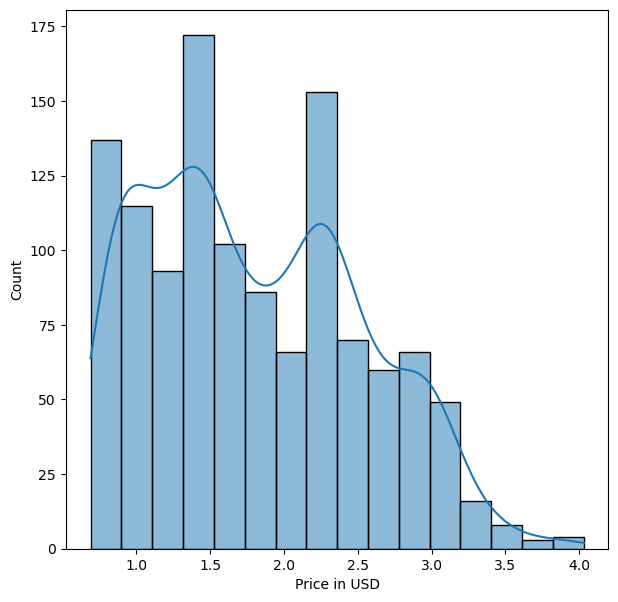

In [21]:
plt.figure(figsize=(7,7))
sns.histplot(data=dt, x="Price in USD", kde=True)
plt.show()

In [22]:
dt['Currency '].unique()

array(['AUD', 'Kr', 'JPY ', 'ZAR', 'CAD'], dtype=object)

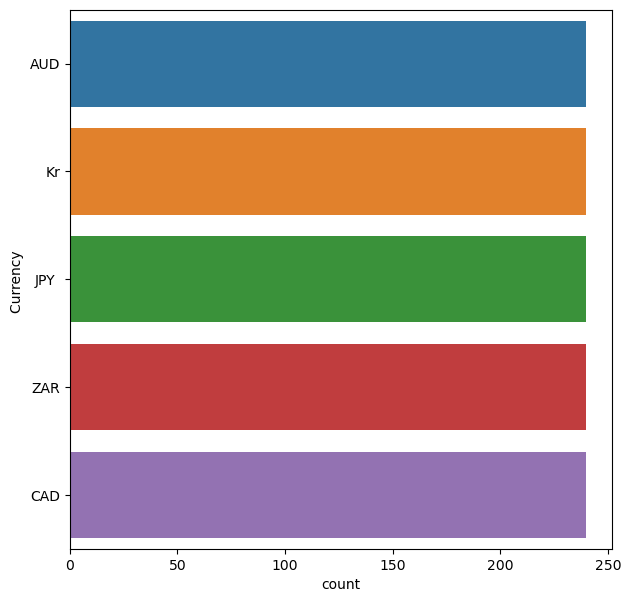

In [23]:
plt.figure(figsize=(7,7))
sns.countplot(data = dt,  y='Currency ')
plt.show() 

 - AUD : dollard australien
 - Kr : Couronne suédoise égal
 - Jpy : Yen monnaie japonnaise
 - ZAR : rand monnaie afrique du sud
 - CAD : Dollard cannadien

## Availability

In [24]:
dt['Availability '].unique()
# variable a supprimer

array([1], dtype=int64)

## Quality

In [25]:
dt['Quality '].unique()

array(['High', 'Medium'], dtype=object)

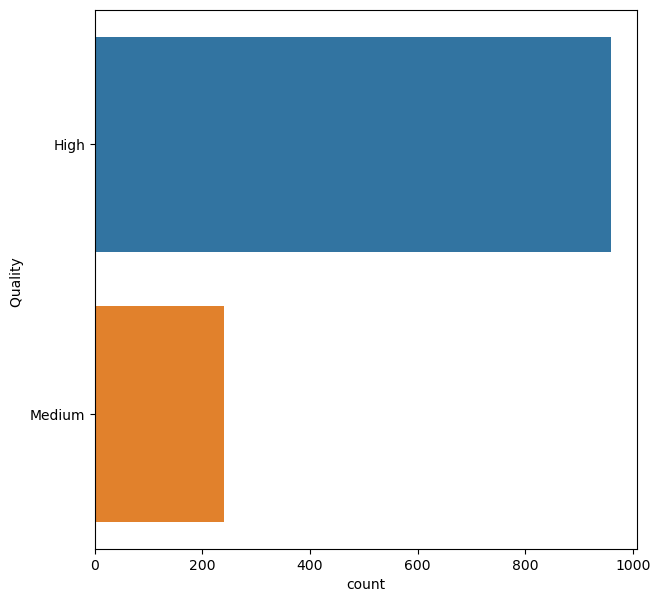

In [26]:
plt.figure(figsize=(7,7))
sns.countplot(data = dt,  y='Quality ')
plt.show() 

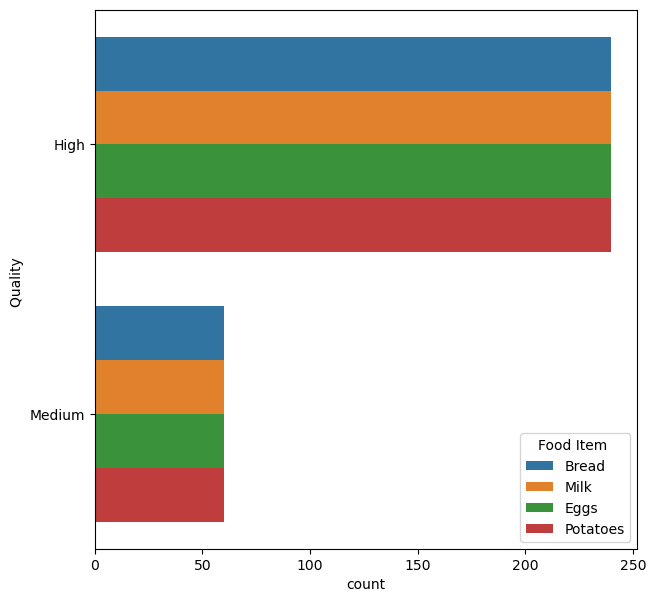

In [27]:
plt.figure(figsize=(7,7))
sns.countplot(data = dt,  y='Quality ', hue = 'Food Item ')
plt.show() 

# Nettoyage du dataset

In [28]:
dt.isnull().sum()

Country                0
Year                   0
Month                  0
Food Item              0
Unit of Measurement    0
Average Price          0
Currency               0
Price in USD           0
Availability           0
Quality                0
dtype: int64

In [29]:
dt.rename(columns = {'Country ':'Country','Food Item ':'Food Item','Quality ': 'Quality', "Average Price ":"Average Price",'Month ':'Month', 'Year ':'Year', 'Currency ':'Currency'}, inplace = True)

In [30]:
dt.columns

Index(['Country', 'Year', 'Month', 'Food Item', 'Unit of Measurement',
       'Average Price', 'Currency', 'Price in USD', 'Availability ',
       'Quality'],
      dtype='object')

In [31]:
dt.drop('Availability ', axis=1, inplace =True)

In [32]:
dt.shape

(1200, 9)

In [33]:
dt['Year'] = dt['Year'].astype('object')
dt['Month'] = dt['Month'].astype('object')

In [34]:
dt.dtypes

Country                 object
Year                    object
Month                   object
Food Item               object
Unit of Measurement     object
Average Price          float64
Currency                object
Price in USD           float64
Quality                 object
dtype: object

In [35]:
dt.head()

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,High
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,High
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,High
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,High
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,High


# Analyse bivariée et multivariée

Afficher l'évolution des prix de 2018 à 2023 dans différents pays pour les produits essentiel tels que le lait, le pain, les oeufs et les pommes de terres

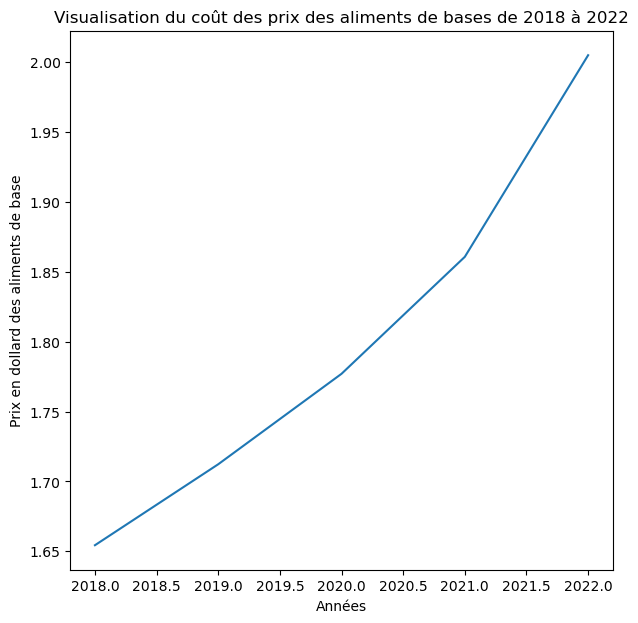

In [36]:
plt.figure(figsize=(7,7))
plt.title("Visualisation du coût des prix des aliments de bases de 2018 à 2022")
dt.groupby(['Year'])['Price in USD'].mean().plot(kind='line')
plt.xlabel('Années')
plt.ylabel('Prix en dollard des aliments de base')
plt.show()

On remarque une augmentation presque linéaire de 2018 à 2021 et une nette augmentation entre 2021 et 2022

In [37]:
agg1 = dt.groupby('Country').agg('mean').reset_index()

C:\Users\hajer\AppData\Local\Temp\ipykernel_22368\3976883157.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg1 = dt.groupby('Country').agg('mean').reset_index()


In [38]:
agg1.head()

,Country,Average Price,Price in USD
0,Australia,2.868958,1.925583
1,Canada,3.148292,2.392708
2,Japan,252.090333,1.814833
3,South Africa,18.761583,1.035667
4,Sweden,18.778583,1.840417


C:\Users\hajer\AppData\Local\Temp\ipykernel_22368\3623478694.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


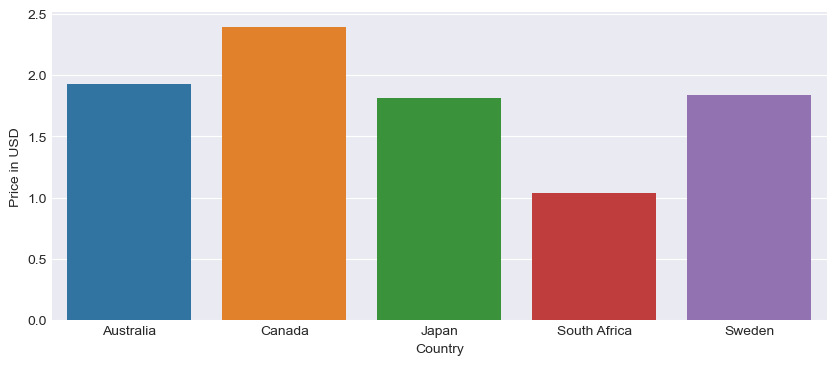

In [39]:
plt.figure(figsize=(10,4))
# Change the style of plot
plt.style.use('seaborn-darkgrid')
# Create a color palette
palette = plt.get_cmap('Set1')

sns.barplot(data = agg1, x='Country',y='Price in USD')

plt.show()

En moyenne, les aliments de bases coûtent plus cher au canada que les autres pays ensuite arrive l'Australie en deuxième position, ensuite la suède puis le japon et enfin l'Afrique du sud

In [40]:
agg2 = dt.groupby(['Year','Country']).agg('mean').reset_index()

C:\Users\hajer\AppData\Local\Temp\ipykernel_22368\2156962293.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg2 = dt.groupby(['Year','Country']).agg('mean').reset_index()


In [41]:
agg2.head()

,Year,Country,Average Price,Price in USD
0,2018,Australia,2.480208,1.664583
1,2018,Canada,3.012708,2.289583
2,2018,Japan,239.826250,1.725833
3,2018,South Africa,17.326667,0.956458
4,2018,Sweden,16.686042,1.635417


In [42]:
agg2['Year'].unique()

array([2018, 2019, 2020, 2021, 2022], dtype=int64)

C:\Users\hajer\AppData\Local\Temp\ipykernel_22368\3932483502.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


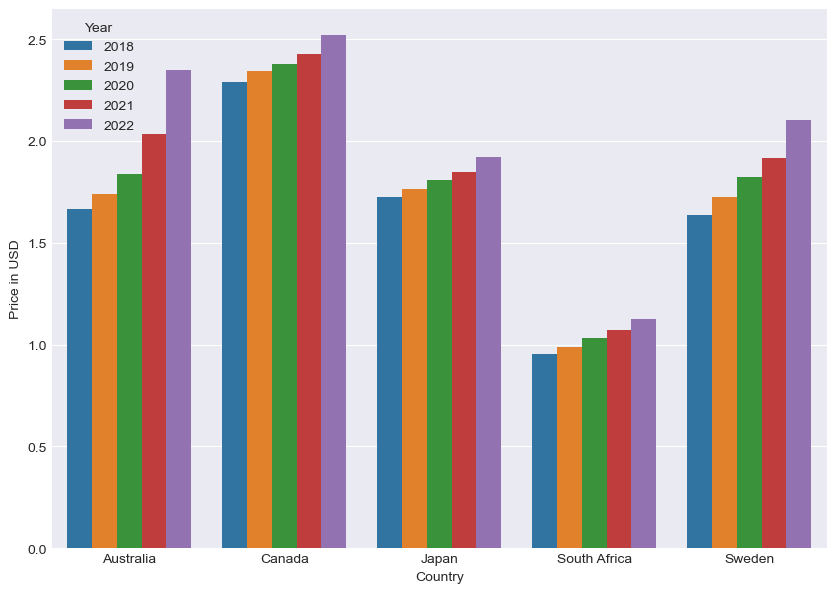

In [43]:
plt.figure(figsize=(10,7))
# Change the style of plot
plt.style.use('seaborn-darkgrid')
# Create a color palette
palette = plt.get_cmap('Set1')
plt.title('')
sns.barplot(data = agg2, x='Country',y='Price in USD', hue='Year')

plt.show()

Le graphique ci-dessus montre la prix des aliments de base pour chaque pays en fonction de l'année.

Pour chaque pays, on remarque bien une progression linéaire des prix entre 2018 et 2022 pour l'afrique du sud et le japon, le canada.
Pour l'Australie, la hausse des prix est presque exponentielle comparé aux autre pays.

In [44]:
dt.head()

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,High
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,High
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,High
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,High
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,High


In [45]:
data = pd.pivot_table(dt, values='Price in USD', index = 'Year', columns ='Country', aggfunc=np.sum)

In [46]:
data

Country,Australia,Canada,Japan,South Africa,Sweden
Year,,,,,
2018,79.90,109.90,82.84,45.91,78.50
2019,83.60,112.44,84.67,47.44,82.80
2020,88.14,114.27,86.92,49.64,87.51
2021,97.65,116.58,88.83,51.51,91.99
2022,112.85,121.06,92.30,54.06,100.90


C:\Users\hajer\AppData\Local\Temp\ipykernel_22368\1537619552.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


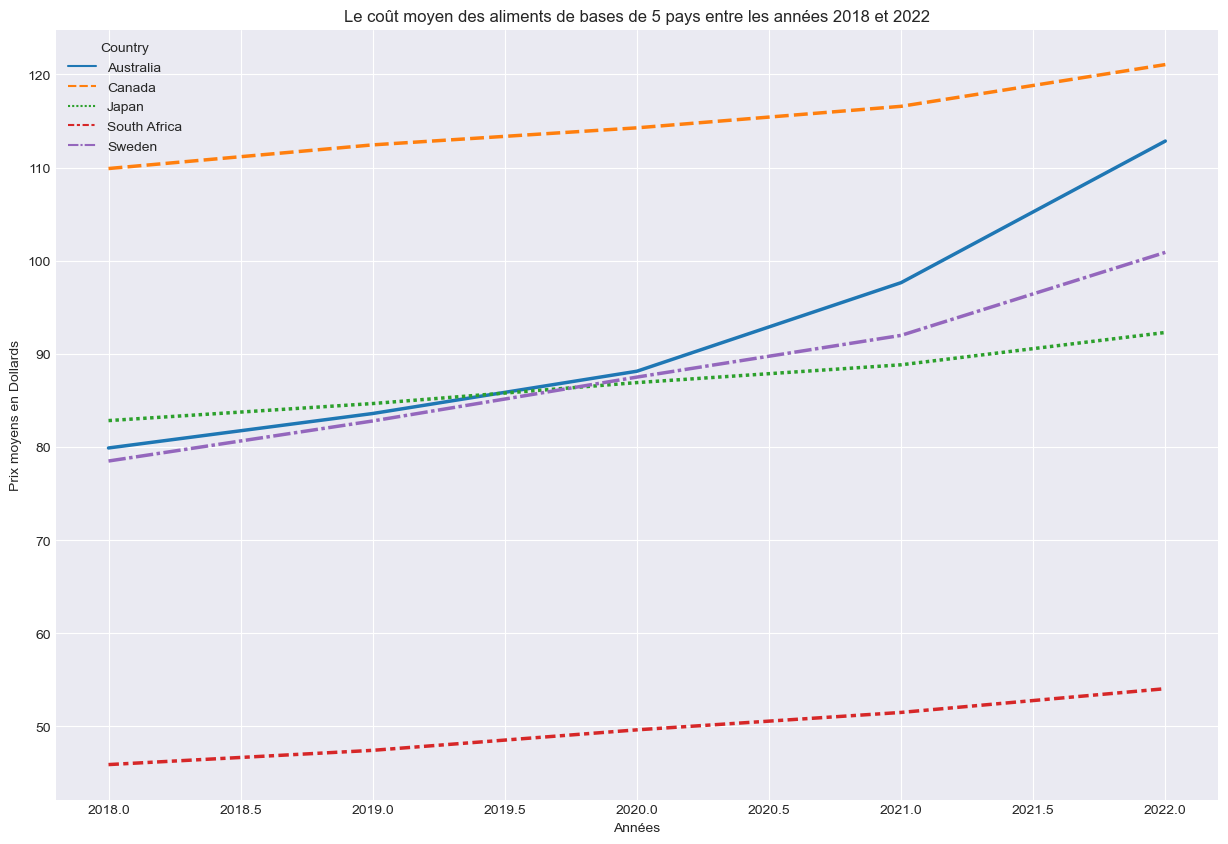

In [47]:
plt.figure(figsize=(15,10))
# Change the style of plot
plt.style.use('seaborn-darkgrid')
plt.title('Le coût moyen des aliments de bases de 5 pays entre les années 2018 et 2022')
# Create a color palette
palette = plt.get_cmap('Set1')
plt.ylabel('Prix moyens en Dollards')
plt.xlabel('Années')
sns.lineplot(data=data, palette="tab10", linewidth=2.5)
plt.show()

Le graphique ci-dessus montre le coût moyen des aliments de bases dans 5 pays entre 2018 et 2022.
Pendant cette période les prix moyens des aliments de bases ont tous augmenté. On remarque de plus qu'entre 2018 et 2019 l'Australie et la suède avaient des prix inférieurs au Japon et aprés 2020, les prix de l'Australie et de la suède flambent et dépassent ceux du Japon. 

In [48]:
data1 = pd.pivot_table(dt, values='Price in USD', index = 'Year', columns ='Food Item', aggfunc=np.sum)

In [49]:
data1.head()

Food Item,Bread,Eggs,Milk,Potatoes
Year,,,,
2018,91.37,127.80,70.56,107.32
2019,94.90,132.59,73.35,110.11
2020,97.63,138.38,75.69,114.78
2021,101.03,148.48,78.59,118.46
2022,108.55,165.26,82.79,124.57


C:\Users\hajer\AppData\Local\Temp\ipykernel_22368\1536303290.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


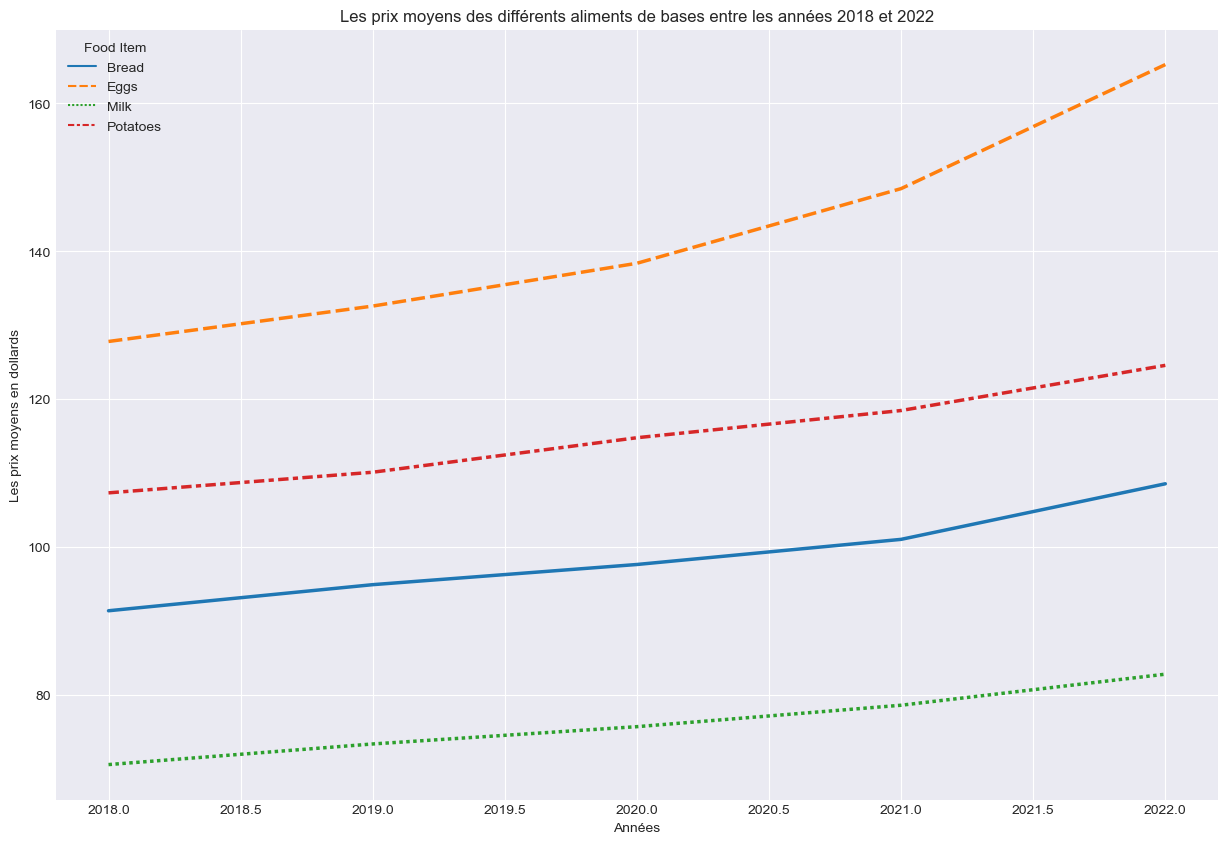

In [50]:
plt.figure(figsize=(15,10))
# Change the style of plot
plt.style.use('seaborn-darkgrid')
plt.title('Les prix moyens des différents aliments de bases entre les années 2018 et 2022')
# Create a color palette
palette = plt.get_cmap('Set1')
plt.ylabel('Les prix moyens en dollards')
plt.xlabel('Années')
sns.lineplot(data=data1, palette="tab10", linewidth=2.5)
plt.show()

C:\Users\hajer\AppData\Local\Temp\ipykernel_22368\3668211847.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


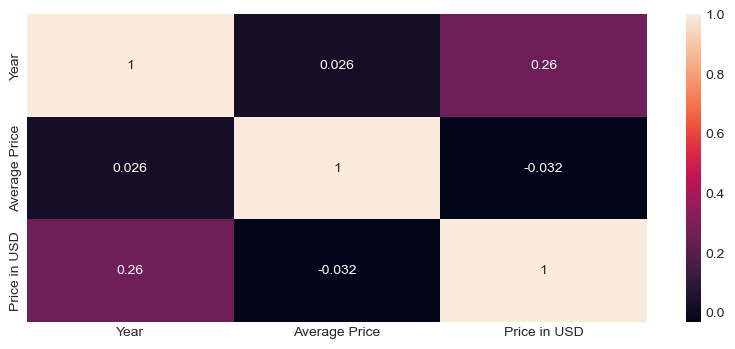

In [51]:
plt.figure(figsize=(10,4))
# Change the style of plot
plt.style.use('seaborn-darkgrid')
# Create a color palette
palette = plt.get_cmap('Set1')

sns.heatmap(data=agg2.select_dtypes(include=['int64','float64']).corr(), annot=True)

plt.show()

La variable qui a le plus d'influence sur le prix est l'année

on remarque bien que pour les 5 pays, l'inflation en 2022 est la plus haute

# Time series : indiquez à pandas notre variable temporelle :) !

#### 1er méthode

In [52]:
dt['Date'] = pd.to_datetime(dt[['Year', 'Month']].assign(day=1))
dt.set_index('Date', inplace=True)

In [53]:
dt.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='Date', length=1200, freq=None)

In [54]:
data_series = pd.pivot_table(dt, values='Price in USD', index = 'Date', columns ='Food Item')

In [55]:
data_series.head()

Food Item,Bread,Eggs,Milk,Potatoes
Date,,,,
2018-01-01,1.500,2.110,1.156,1.778
2018-02-01,1.510,2.114,1.160,1.780
2018-03-01,1.510,2.118,1.162,1.780
2018-04-01,1.512,2.120,1.166,1.784
2018-05-01,1.518,2.124,1.172,1.788


C:\Users\hajer\AppData\Local\Temp\ipykernel_22368\2724344602.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_series['2021']['Bread'].plot()


<Axes: xlabel='Date'>

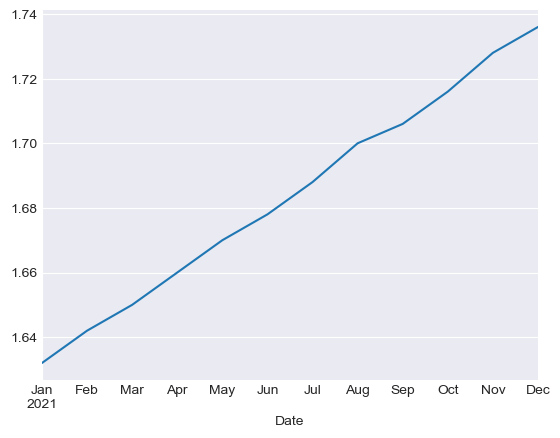

In [56]:
data_series['2021']['Bread'].plot()

C:\Users\hajer\AppData\Local\Temp\ipykernel_22368\2975705261.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_series['2021'][['Bread', 'Eggs', 'Milk', 'Potatoes']].plot()


<Axes: xlabel='Date'>

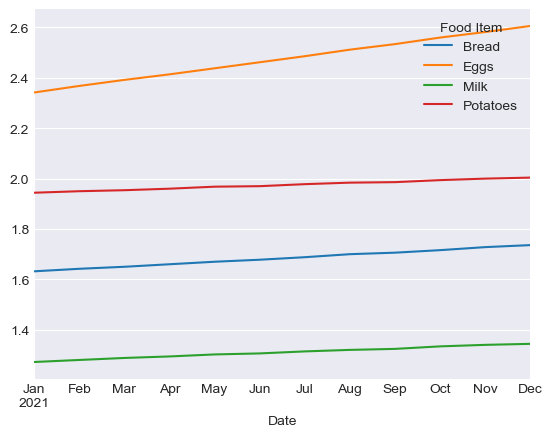

In [57]:
data_series['2021'][['Bread', 'Eggs', 'Milk', 'Potatoes']].plot()

<Axes: xlabel='Date'>

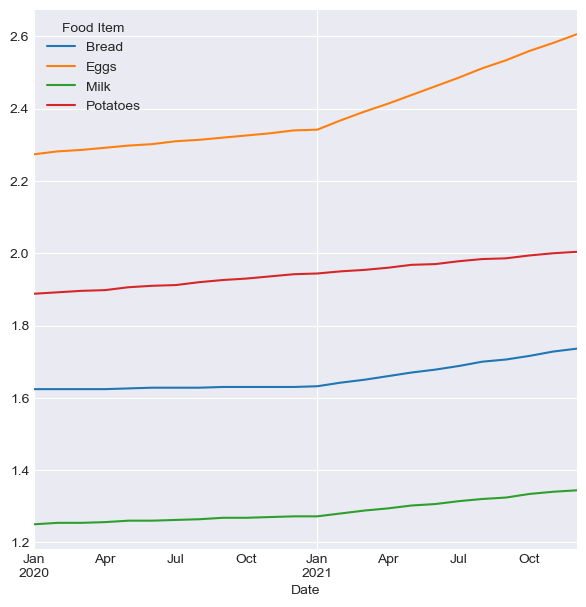

In [58]:
data_series['2020':'2021'][['Bread', 'Eggs', 'Milk', 'Potatoes']].plot(figsize=(7,7))

In [59]:
data_series2 = pd.pivot_table(dt, values='Price in USD', index = 'Date', columns ='Country', aggfunc=np.sum)

In [60]:
data_series2.head()

Country,Australia,Canada,Japan,South Africa,Sweden
Date,,,,,
2018-01-01,6.55,9.06,6.87,3.77,6.47
2018-02-01,6.58,9.09,6.88,3.79,6.48
2018-03-01,6.59,9.10,6.88,3.79,6.49
2018-04-01,6.61,9.11,6.88,3.81,6.50
2018-05-01,6.63,9.14,6.90,3.82,6.52


<Axes: xlabel='Date'>

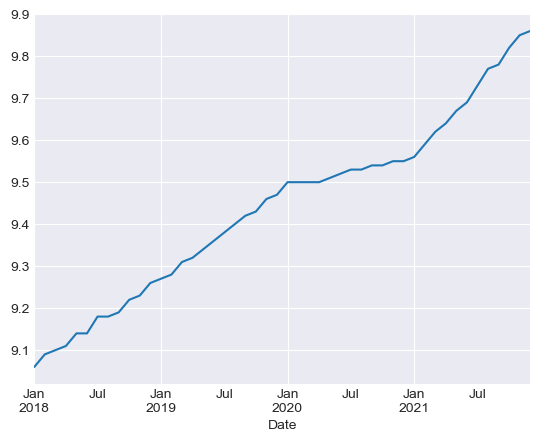

In [61]:
data_series2['2018':'2021']['Canada'].plot()

<Axes: xlabel='Date'>

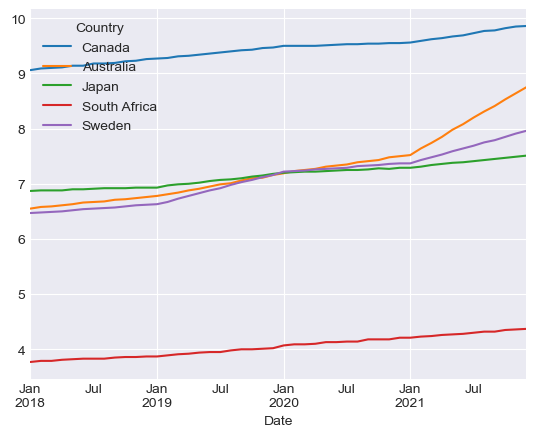

In [62]:
data_series2['2018':'2021'][['Canada','Australia','Japan','South Africa','Sweden']].plot()

#### Fonction resample

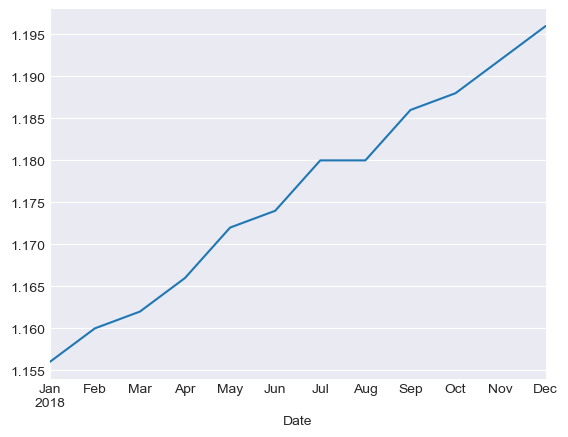

In [63]:
data_series.loc['2018','Milk'].resample('M').mean().plot()
plt.show()

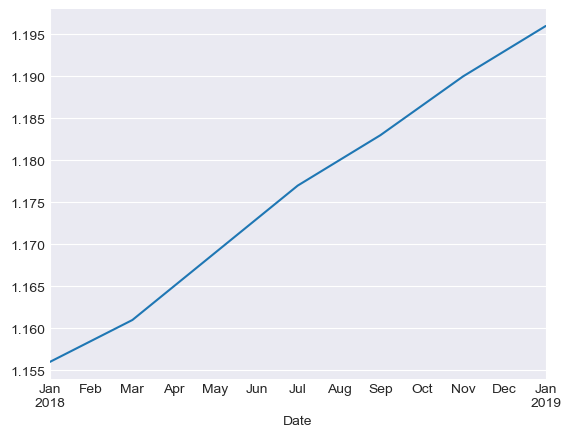

In [64]:
data_series.loc['2018','Milk'].resample('2M').mean().plot()
plt.show()

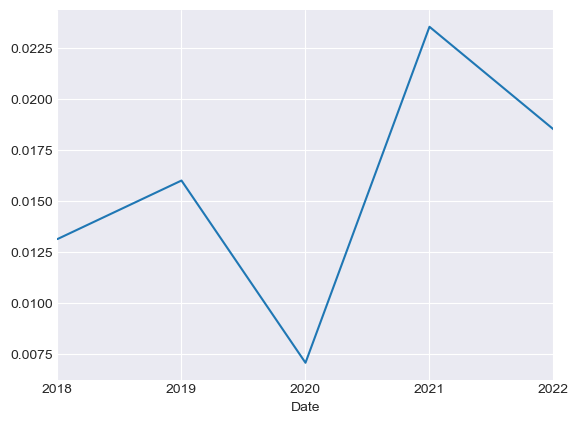

In [65]:
data_series.loc['2018':'2022','Milk'].resample('Y').std().plot()
plt.show()

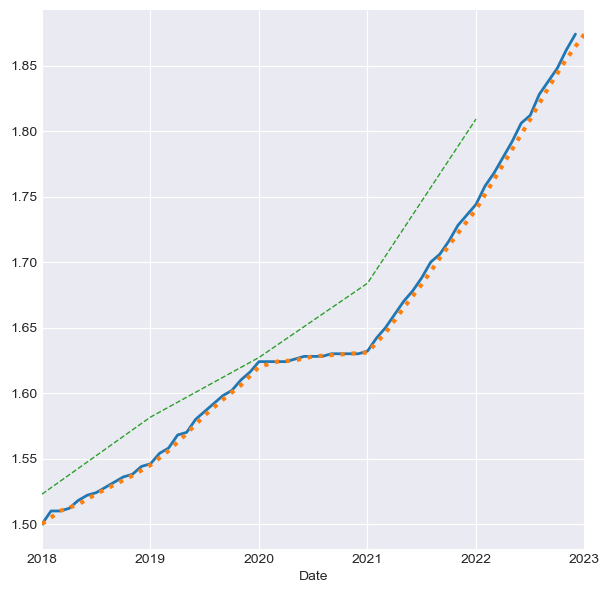

In [66]:
plt.figure(figsize=(7,7))
data_series.loc['2018':'2022','Bread'].plot(lw=2)
data_series.loc['2018':'2022','Bread'].resample('2M').mean().plot(label='moyenne tous les 2 mois',lw=3,ls=':')
data_series.loc['2018':'2022','Bread'].resample('Y').mean().plot(label='moyenne toute les années',lw=1,ls='--')

plt.show()

#### Fonction aggregate

In [67]:
dt.head()

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Quality
Date,,,,,,,,,
2018-01-01,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,High
2018-02-01,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,High
2018-03-01,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,High
2018-04-01,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,High
2018-05-01,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,High


In [68]:
l= dt['Price in USD'].resample('M').agg(['mean','std','min','max'])
l.head()

,mean,std,min,max
Date,,,,
2018-01-31,1.6360,0.660139,0.69,2.88
2018-02-28,1.6410,0.659736,0.70,2.88
2018-03-31,1.6425,0.660581,0.70,2.89
2018-04-30,1.6455,0.659581,0.70,2.89
2018-05-31,1.6505,0.659804,0.71,2.90


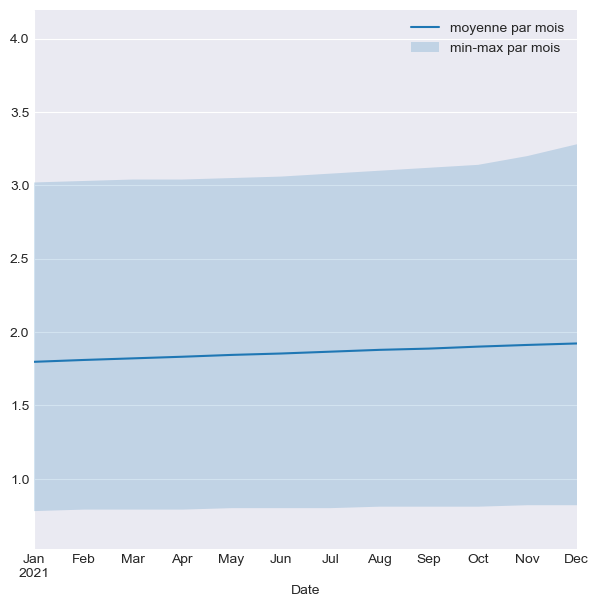

In [72]:
plt.figure(figsize=(7,7))
l['mean']['2021'].plot(label='moyenne par mois')
plt.fill_between(l.index,l['max'],l['min'],alpha=0.2, label='min-max par mois')

plt.legend()
plt.show()

#### Moving average

Technique qui permet de calculer une moyennr sur une plage de valeurs.
Exemple : calcul de la moyenne sur 7 jours, puis décalage d'un jour et on recalcul la moyenne sur les 7 jours suivants ect ...

# Modélisation

In [69]:
from statsmodels.tsa.arima.model import ARIMA

# Optimisation

# Prédiction